# import the Libaries, layers for Model 1

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
model_1 = tf.keras.models.Sequential()

In [3]:
# Here we can see the difference between Sequential Api AND Functional Api

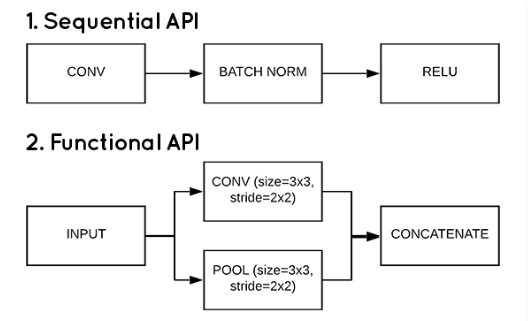

# Sequential API
### The sequential API allows you to create models layer-by-layer for most problems. 
### It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
### for more details please click the link...
https://www.tensorflow.org/guide/keras/sequential_model

# Functional API
### The functional API can handle models with non-linear topology 
### shared layers, and even multiple inputs or outputs. 
### The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers
### for more details please click the link...
https://www.tensorflow.org/guide/keras/functional

# Batch normalization

In [ ]:
# Batch normalization is a layer that allows every layer of the network to do learning more independently. 
# It is used to normalize the output of the previous layers. 
# The activations scale the input layer in normalization

# Design a simple and precise CNN model by using Conv2D and MaxPooling2D

In [6]:
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))

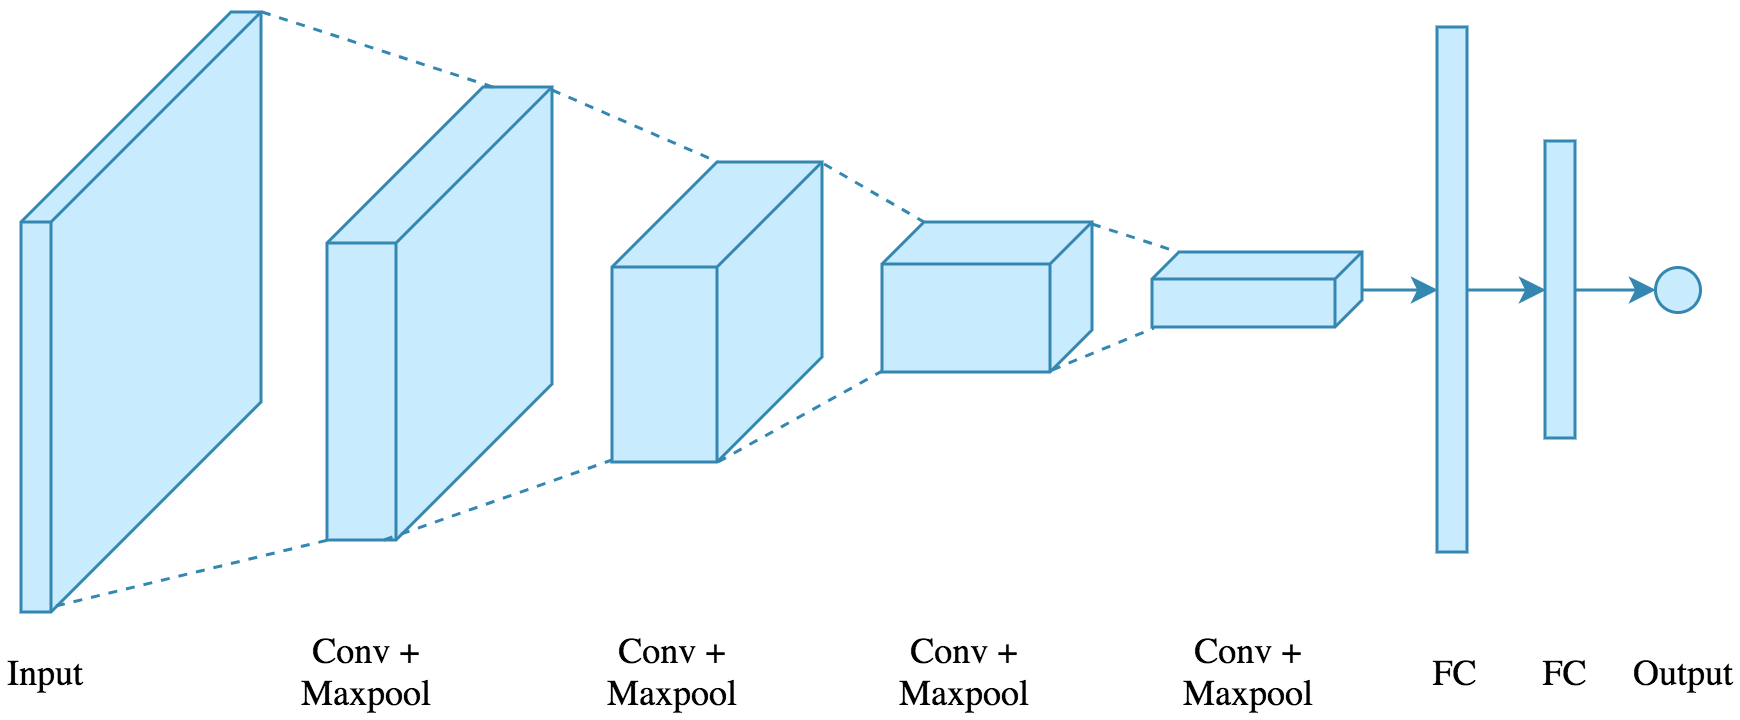

In [7]:
# As we can see clearly, input data having higher dimensions (2D), by the help of Conv+MaxPool layers we decrease the dimensions.
# we can see on the last layer input data is very low(1D), so last layer recieved input data only in one dimension.


### You can get more detail about Conv2D, Its Parameters,Filters....from the lick below.

http://man.hubwiz.com/docset/TensorFlow.docset/Contents/Resources/Documents/api_docs/python/tf/layers/Conv2D.html

In [8]:
# As we can the see summary of the model 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


# Adding a classifier on top of the convnet

In [9]:
# Here we are adding classifier, but before that we are using flatten function to make one Dimension(1D) array.
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
# we are using softmax activation function on last layer
model_1.add(layers.Dense(10, activation='softmax'))

### Click the link for complete information about Softmax activation Function:
https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax

In [10]:
# now we can see the complete summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [11]:
# we are importing mnist dataset from tensorflow.keras datasets 
from tensorflow.keras.datasets import mnist
# importing to_categorical(Converts a class vector (integers) to binary class matrix.)
from tensorflow.keras.utils import to_categorical
# Spliting the dataset into train and test 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# to_categorical

In [ ]:
# You use to_categorical to transform your training data before you pass it to your model. 
# If your training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with models. 
# You can't simply train a classification model without that

# Normalizing the complete datasets and also reshape all picture into same size 

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# compile the model using loss function "categorical_crossentropy" and optimizer "rmsprop" and check the "accuracy"
model_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Categorical_crossentropy


In [3]:
# You use to_categorical to transform your training data before you pass it to your model. 
# If your training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with models. 
#You can't simply train a classification model without that

# Data load into the model 

In [14]:
# we set only 5 epochs and batch size is 64, we can change both of them as experiment 
model_1.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 32s 33ms/step - loss: 0.1693 - accuracy: 0.9463
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0485 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0320 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 33s 36ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0195 - accuracy: 0.9940


# Evaluating the model by test the model of unseen data, test loss and test accuracy.  

In [15]:

test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print(test_acc)
print(test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.0255 - accuracy: 0.9913
0.9912999868392944
0.025538889691233635


In [16]:
# we can see the test accuracy is 0.99 and test loss 0.02

# Model 2 of CNN for mnist dataset.

In [17]:
# Import Libraries
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM



# Normalizing the complete datasets


In [18]:
# Loading the Data from keras
mnist = tf.keras.datasets.mnist
# spliting the dataset into test and train
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalization the dataset
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

# Design a functional Api,CNN model by using Conv2D and MaxPooling2D

In [19]:
## Functional Api model:
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)

model_2 = KM.Model(inputs, outputs)

In [20]:
# model summary 
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0     

# Adding a classifier on top of the convnet

In [21]:
model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])



# Difference Between sparse_categorical_crossentropy and categorical_crossentropy

In [5]:
# The only difference between sparse categorical cross entropy and categorical cross entropy is the format of true labels. 
# When we have a single-label, multi-class classification problem, the labels are mutually exclusive for each data, meaning each data entry can only belong to one class.

# Data load into the model

In [22]:
model_2.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2390 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0842 - accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0564 - accuracy: 0.9817
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0262 - accuracy: 0.9914
Test Loss: 0.02622266300022602 - Test Acc: 0.9914000034332275


# Table 

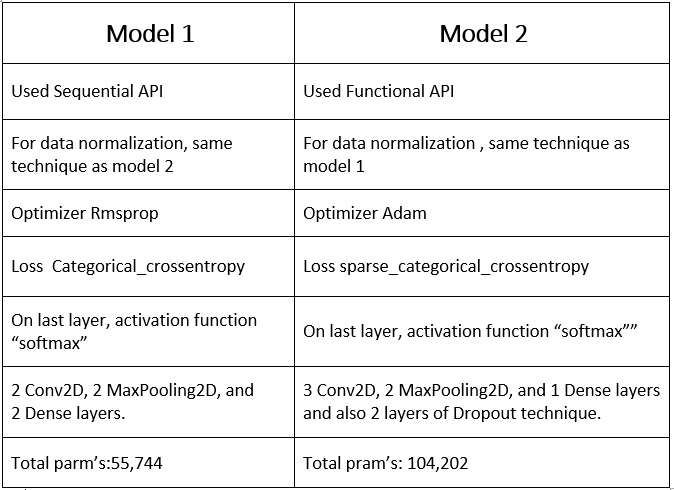

# Results of both models

In [6]:
# in model 1 i got test accuracy = 0.9912999868392944 and test loss = 0.025538889691233635
# in model 2 i got test accuracy = 0.9914000034332275 and test loss = 0.02622266300022602